# Using merge_ordered()

```python
# Merging stock data
import pandas as pd
pd.merge_ordered(appl, mcd, on='date', suffixes=('_aapl','_mcd'))

# Forward fill example
pd.merge_ordered(appl, mcd, on='date',
suffixes=('_aapl','_mcd'),
fill_method='ffill')
```

[Correlation between GDP and S&P500 | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=2)

> ## Correlation between GDP and S&P500
> 
> In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.
> 
> Two tables have been provided for you, named `sp500`, and `gdp`. As always, `pandas` has been imported for you as `pd`.

### init

In [2]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(sp500, gdp)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'gdp.csv': 'https://file.io/Bfx8nVUxfhy4',
  'sp500.csv': 'https://file.io/hPtlfycRbLmY'}}
"""
prefixToc='1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
sp500 = pd.read_csv(prefix+'sp500.csv',index_col=0)
gdp = pd.read_csv(prefix+'gdp.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'gdp.csv': 'https://file.io/Bfx8nVUxfhy4', 'sp500.csv': 'https://file.io/hPtlfycRbLmY'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   311    0   311    0     0    611      0 --:--:-- --:--:-- --:--:--   611

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141    0   141    0     0    271      0 --:--:-- --:--:-- --:--:--   270



### code

> -   Use `merge_ordered()` to merge `gdp` and `sp500` using a left join on `year` and `date`. Save the results as `gdp_sp500`.
> -   Print `gdp_sp500` and look at the returns for the year 2018.

In [3]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

  country code  year           gdp    date  returns
0          USA  2010  1.499210e+13  2010.0    12.78
1          USA  2011  1.554260e+13  2011.0     0.00
2          USA  2012  1.619700e+13  2012.0    13.41
3          USA  2012  1.619700e+13  2012.0    13.41
4          USA  2013  1.678480e+13  2013.0    29.60
5          USA  2014  1.752170e+13  2014.0    11.39
6          USA  2015  1.821930e+13  2015.0    -0.73
7          USA  2016  1.870720e+13  2016.0     9.54
8          USA  2017  1.948540e+13  2017.0    19.42
9          USA  2018  2.049410e+13     NaN      NaN


> Use `merge_ordered()`, again similar to before, to merge `gdp` and `sp500` use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable `gdp_sp500`.

In [4]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left', fill_method='ffill')


# Print gdp_sp500
print (gdp_sp500)

  country code  year           gdp  date  returns
0          USA  2010  1.499210e+13  2010    12.78
1          USA  2011  1.554260e+13  2011     0.00
2          USA  2012  1.619700e+13  2012    13.41
3          USA  2012  1.619700e+13  2012    13.41
4          USA  2013  1.678480e+13  2013    29.60
5          USA  2014  1.752170e+13  2014    11.39
6          USA  2015  1.821930e+13  2015    -0.73
7          USA  2016  1.870720e+13  2016     9.54
8          USA  2017  1.948540e+13  2017    19.42
9          USA  2018  2.049410e+13  2017    19.42


> -   Subset the `gdp_sp500` table, select the `gdp` and `returns` columns, and save as `gdp_returns`.
> -   Print the correlation matrix of the `gdp_returns` table.

In [5]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.212173
returns  0.212173  1.000000


[Phillips curve using merge_ordered() | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=3)

> ## Phillips curve using merge\_ordered()
> 
> There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.
> 
> You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.
> 
> The tables `unemployment` and `inflation` have been loaded for you.

### init

In [6]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(unemployment , inflation)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'inflation.csv': 'https://file.io/UfmEixpiOglS',
  'unemployment.csv': 'https://file.io/eEWiPOYRsd62'}}
"""
prefixToc='1.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
unemployment = pd.read_csv(prefix+'unemployment.csv',index_col=0)
inflation = pd.read_csv(prefix+'inflation.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'inflation.csv': 'https://file.io/UfmEixpiOglS', 'unemployment.csv': 'https://file.io/eEWiPOYRsd62'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3865    0  3865    0     0   7839      0 --:--:-- --:--:-- --:--:--  7839

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   266    0   266    0     0    524      0 --:--:-- --:--:-- --:--:--   523



### code

> -   Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on `date` with an inner join, and save the results as `inflation_unemploy`.
> -   Print the `inflation_unemploy` variable.
> -   Using `inflation_unemploy`, create a scatter plot with `unemployment_rate` on the horizontal axis and `cpi` (inflation) on the vertical axis.

In [8]:
import matplotlib.pyplot as plt

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


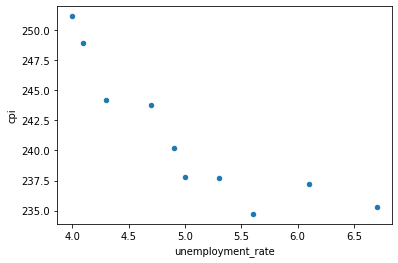

In [12]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')
# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot('unemployment_rate', 'cpi', kind='scatter')
plt.show()

[merge_ordered() caution, multiple columns | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=4)

> ## merge\_ordered() caution, multiple columns
> 
> When using `merge_ordered()` to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.
> 
> The tables `gdp` and `pop` have been loaded.

### init

In [13]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(pop, gdp)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'gdp.csv': 'https://file.io/gAF89IhHSZ7Q',
  'pop.csv': 'https://file.io/P8NL46hLB7kH'}}
"""
prefixToc='1.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
pop = pd.read_csv(prefix+'pop.csv',index_col=0)
gdp = pd.read_csv(prefix+'gdp.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'gdp.csv': 'https://file.io/gAF89IhHSZ7Q', 'pop.csv': 'https://file.io/P8NL46hLB7kH'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1587    0  1587    0     0   3206      0 --:--:-- --:--:-- --:--:--  3199

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   366    0   366    0     0    693      0 --:--:-- --:--:-- --:--:--   693



### code

> Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date` and `country` with the fill feature, save to `ctry_date`.

In [16]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date', 'country'], 
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

          date    country           gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-01-01     Sweden   79837.84599  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2   1990-04-01  Australia  158263.58160  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3   1990-04-01     Sweden   80582.28597  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4   1990-07-01  Australia  157329.27900  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5   1990-07-01     Sweden   79974.36017  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6   1990-09-01  Australia  158240.67810  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7   1990-09-01     Sweden   80106.49738  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8   1991-01-01  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9   1991-01-01     Sweden   79524.24192  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10  1991-04-01  Australia  155989.03270  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11  1991-04-01     Sweden   79073.05901  NYGDPMKTPSA

> -   Perform the same merge of `gdp` and `pop`, but join on `country` and `date` (**reverse of step 1**) with the fill feature, saving this as `date_ctry`.

In [17]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country', 'date'], 
                             fill_method='ffill')

# Print date_ctry
print(date_ctry)

          date    country           gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-04-01  Australia  158263.58160  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2   1990-07-01  Australia  157329.27900  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3   1990-09-01  Australia  158240.67810  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4   1991-01-01  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
5   1991-04-01  Australia  155989.03270  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
6   1991-07-01  Australia  156635.85760  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
7   1991-09-01  Australia  156744.05660  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
8   1992-01-01  Australia  157916.08110  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
9   1992-04-01  Australia  159047.82710  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
10  1992-07-01  Australia  160658.17600  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
11  1992-09-01  Australia  163960.22070  NYGDPMKTPSA

# Using merge_asof()

```python

# merge_asof() example
pd.merge_asof(visa, ibm, on='date_time',
suffixes=('_visa','_ibm'))

# merge_asof() example with direction
pd.merge_asof(visa, ibm, on=['date_time'],
suffixes=('_visa','_ibm'),
direction='forward')
```

[Using merge_asof() to study stocks | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=6)

> ## Using merge\_asof() to study stocks
> 
> You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, _JP Morgan_ (JPM), _Wells Fargo_ (WFC), and _Bank Of America_ (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas` `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.
> 
> The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

### init

In [31]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(jpm, wells,  bac)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'bac.csv': 'https://file.io/S9rn7O6fmqHa',
  'jpm.csv': 'https://file.io/g7xqrvUdPhtq',
  'wells.csv': 'https://file.io/EJo9kryypz23'}}
"""
prefixToc='2.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
jpm = pd.read_csv(prefix+'jpm.csv',index_col=0, parse_dates=['date_time'] )
wells = pd.read_csv(prefix+'wells.csv',index_col=0, parse_dates=['date_time'])
bac = pd.read_csv(prefix+'bac.csv',index_col=0, parse_dates=['date_time'])


Téléchargements déjà effectués - SKIP


### code

> -   Use `merge_asof()` to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the **_nearest_** times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.
> -   Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.
> -   Using `price_diffs`, create a line plot of the close price of JPM, WFC, and BAC only.

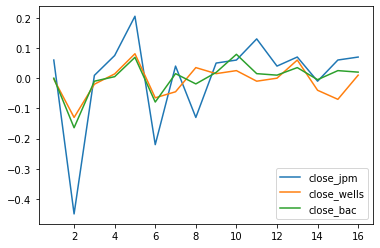

In [34]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on=['date_time'], direction='nearest', suffixes=('', '_wells'))


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', direction='nearest', suffixes=('_jpm', '_bac'))


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

[Using merge_asof() to create dataset | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=7)

> ## Using merge\_asof() to create dataset
> 
> The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.
> 
> The tables `gdp` and `recession` have been loaded for you.

### init

In [41]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(gdp, recession)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'gdp.csv': 'https://file.io/sBR5EckCGj3q',
  'recession.csv': 'https://file.io/S2MPJr6fkRHQ'}}
"""
prefixToc='2.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
gdp = pd.read_csv(prefix+'gdp.csv',index_col=0 , parse_dates=['date'])
recession = pd.read_csv(prefix+'recession.csv',index_col=0, parse_dates=['date'])



Téléchargements déjà effectués - SKIP


### code

> -   Using `merge_asof()`, merge `gdp` and `recession` on `date`, with `gdp` as the left table. Save to the variable `gdp_recession`.
> -   Create a `list` using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to 'recession' then enter `'r'` else `'g'`.
> -   Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the `color` argument equal to `is_recession`.

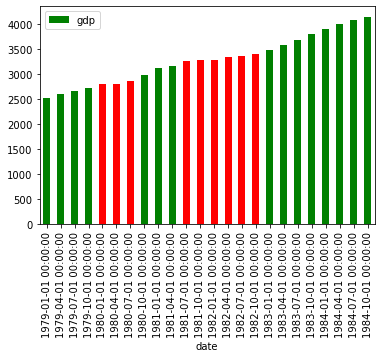

In [42]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

# Selecting data with .query()

```python

# Querying on a single condition
stocks.query('nike >= 90')

# Querying on a multiple conditions, "and", "or"
stocks.query('nike > 90 and disney < 140')
stocks.query('nike > 96 or disney < 98')

# Using .query() to select text
stocks_long.query('stock=="disney" or (stock=="nike" and close < 90)')
```

[Explore financials with .query() | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=10)

> ## Explore financials with .query()
> 
> You have been given a table of financial data from some popular social network companies called `social_fin`. All of the values are in thousands of US dollars.
> 
> Use the `.query()` method and the console to explore `social_fin` and select the **True** statement.

### init

In [44]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(social_fin)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'social_fin.csv': 'https://file.io/W78FXdD6OsmK'}}
"""
prefixToc='3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
social_fin = pd.read_csv(prefix+'social_fin.csv',index_col=0 )



Téléchargements déjà effectués - SKIP


### code

In [45]:
social_fin.head()

,financial,company,year,value
0,total_revenue,twitter,2019,3459329
1,cost_of_revenue,twitter,2019,1137041
2,gross_profit,twitter,2019,2322288
3,operating_expenses,twitter,2019,1955915
4,net_income,twitter,2019,1465659


In [48]:
social_fin['financial'].value_counts()

net_income            12
cost_of_revenue       12
total_revenue         12
operating_expenses    12
gross_profit          12
Name: financial, dtype: int64

In [49]:
social_fin['company'].value_counts()

facebook    20
twitter     20
snap        20
Name: company, dtype: int64

In [50]:
social_fin.query('value>50000000')

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
7,gross_profit,facebook,2019,57927000
20,total_revenue,facebook,2018,55838000


In [53]:
social_fin.query("financial=='total_revenue' and company=='facebook'")

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
20,total_revenue,facebook,2018,55838000
35,total_revenue,facebook,2017,40653000
50,total_revenue,facebook,2016,27638000


In [54]:
social_fin.query('financial=="net_income" and value<0')

,financial,company,year,value
14,net_income,snap,2019,-1033660
29,net_income,snap,2018,-1255911
34,net_income,twitter,2017,-108063
44,net_income,snap,2017,-3445066
49,net_income,twitter,2016,-456873
59,net_income,snap,2016,-514643


In [55]:
social_fin.query('financial=="gross_profit" and value>100')

,financial,company,year,value
2,gross_profit,twitter,2019,2322288
7,gross_profit,facebook,2019,57927000
12,gross_profit,snap,2019,819696
17,gross_profit,twitter,2018,2077362
22,gross_profit,facebook,2018,46483000
27,gross_profit,snap,2018,381581
32,gross_profit,twitter,2017,1582057
37,gross_profit,facebook,2017,35199000
42,gross_profit,snap,2017,107487
47,gross_profit,twitter,2016,1597379


[Subsetting rows with .query() | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=11)

> ## Subsetting rows with .query()
> 
> In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.
> 
> The tables `gdp` and `pop` have been loaded for you.

### init

In [56]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(gdp, pop)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'gdp.csv': 'https://file.io/lGrAJ8rwnMnu',
  'pop.csv': 'https://file.io/K5yN475ErT2z'}}
"""
prefixToc='3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
gdp = pd.read_csv(prefix+'gdp.csv',index_col=0 )
pop = pd.read_csv(prefix+'pop.csv',index_col=0 )



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'gdp.csv': 'https://file.io/lGrAJ8rwnMnu', 'pop.csv': 'https://file.io/K5yN475ErT2z'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1587    0  1587    0     0   2135      0 --:--:-- --:--:-- --:--:--  2135

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   366    0   366    0     0    764      0 --:--:-- --:--:-- --:--:--   762



### code

> Use `merge_ordered()` on `gdp` and `pop` on columns `country` and `date` with the fill feature, save to `gdp_pop` and print.

In [57]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')

In [59]:
gdp_pop.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL


> -   Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by `pop`.

In [60]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita']=gdp_pop['gdp']/gdp_pop['pop']

In [61]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

In [62]:
gdp_pivot

country,Australia,Sweden
date,,
1990-01-01,0.009262,0.009328
1990-04-01,0.009274,0.009415
1990-07-01,0.009219,0.009344
1990-09-01,0.009273,0.009360
1991-01-01,0.009037,0.009228
1991-04-01,0.009025,0.009176
1991-07-01,0.009062,0.009177
1991-09-01,0.009069,0.009253
1992-01-01,0.009026,0.009159


> Use `.query()` to select rows from `gdp_pivot` where `date` is greater than equal to `1991-01-01"`. Save as `recent_gdp_pop`.

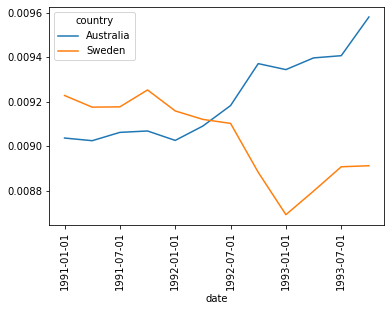

In [63]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

# Reshaping data with .melt()

```python

# Example of .melt()
social_fin_tall = social_fin.melt(id_vars=['financial','company'])

# Melting with value_vars
social_fin_tall = social_fin.melt(id_vars=['financial','company'],
value_vars=['2018','2017'])

# Melting with column names
social_fin_tall = social_fin.melt(id_vars=['financial','company'],
value_vars=['2018','2017'],
var_name=['year'], value_name='dollars')
```

[Select the right .melt() arguments | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=13)

> ## Select the right .melt() arguments
> 
> You are given a table named `inflation`. Chose the option to get the _**same**_ output as the table below.
> 
>        country    indicator  year  annual
>     0   Brazil  Inflation %  2017    3.45
>     1   Canada  Inflation %  2017    1.60
>     2   France  Inflation %  2017    1.03
>     3    India  Inflation %  2017    2.49
>     4   Brazil  Inflation %  2018    3.66
>     5   Canada  Inflation %  2018    2.27
>     6   France  Inflation %  2018    1.85
>     7    India  Inflation %  2018    4.86
>     8   Brazil  Inflation %  2019    3.73
>     9   Canada  Inflation %  2019    1.95
>     10  France  Inflation %  2019    1.11
>     11   India  Inflation %  2019    7.66

### init

In [64]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(inflation)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'inflation.csv': 'https://file.io/GBzey5m7NitK'}}
"""
prefixToc='4.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
inflation = pd.read_csv(prefix+'inflation.csv',index_col=0 )



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'inflation.csv': 'https://file.io/GBzey5m7NitK'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   176    0   176    0     0    352      0 --:--:-- --:--:-- --:--:--   352



### code

In [65]:
inflation.head()

,country,indicator,2017,2018,2019
0,Brazil,Inflation %,3.45,3.66,3.73
1,Canada,Inflation %,1.60,2.27,1.95
2,France,Inflation %,1.03,1.85,1.11
3,India,Inflation %,2.49,4.86,7.66


In [67]:
inflation.melt(id_vars=['country', 'indicator'], var_name='year', value_name='annual')

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


[Using .melt() to reshape government data | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=14)

> ## Using .melt() to reshape government data
> 
> The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a date column to the table and sort by it to plot the data correctly.
> 
> The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to view the table in the console before beginning the exercise.

### init

In [68]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(ur_wide)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'ur_wide.csv': 'https://file.io/eJ4XYT6MrSTa'}}
"""
prefixToc='4.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
ur_wide = pd.read_csv(prefix+'ur_wide.csv',index_col=0 )



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'ur_wide.csv': 'https://file.io/eJ4XYT6MrSTa'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   633    0   633    0     0   1297      0 --:--:-- --:--:-- --:--:--  1297



### code

> -   Use `.melt()` to unpivot all of the columns of `ur_wide` except `year` and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.
> -   Add a column to `ur_tall` named `date` which combines the `year` and `month` columns as _year_\-_month_ format into a larger string, and converts it to a date data type.
> -   Sort `ur_tall` by date and save as `ur_sorted`.
> -   Using `ur_sorted`, plot `unempl_rate` on the y-axis and `date` on the x-axis.

In [69]:
ur_wide.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6


In [78]:
ur_wide['year']=ur_wide['year'].astype(str)

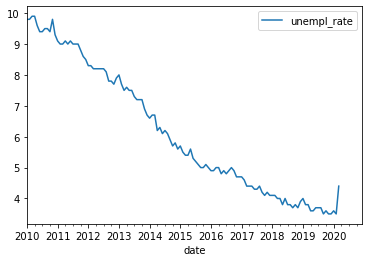

In [79]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot('date', 'unempl_rate')
plt.show()

[Using .melt() for stocks vs bond performance | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/merging-ordered-and-time-series-data?ex=15)

> ## Using .melt() for stocks vs bond performance
> 
> It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.
> 
> Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.
> 
> The tables `ten_yr` and `dji` have been loaded for you.

### init

In [80]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(ten_yr , dji)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'dji.csv': 'https://file.io/fYWYa9G2Avs4',
  'ten_yr.csv': 'https://file.io/EKjGXdz6LUw3'}}
  """
prefixToc='4.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
ten_yr = pd.read_csv(prefix+'ten_yr.csv',index_col=0 )
dji = pd.read_csv(prefix+'dji.csv',index_col=0 )



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'dji.csv': 'https://file.io/fYWYa9G2Avs4', 'ten_yr.csv': 'https://file.io/EKjGXdz6LUw3'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4585    0  4585    0     0   8001      0 --:--:-- --:--:-- --:--:--  7987

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2476    0  2476    0     0   5179      0 --:--:-- --:--:-- --:--:--  5179



### code

> -   Use `.melt()` on `ten_yr` to unpivot everything except the `metric` column, setting `var_name='date'` and `value_name='close'`. Save the result to `bond_perc`.
> -   Using the `.query()` method, select only those rows were `metric` equals 'close', and save to `bond_perc_close`.
> -   Use `merge_ordered()` to merge `dji` (left table) and `bond_perc_close` on `date` with an inner join, and set `suffixes` equal to `('_dow', '_bond')`. Save the result to `dow_bond`.
> -   Using `dow_bond`, plot only the Dow and bond values.

In [81]:
ten_yr.head()

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.014400,...,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544
1,high,-0.007338,-0.040657,0.022046,0.030576,0.080268,-0.021633,-0.059796,-0.038446,0.003615,...,-0.004257,0.041105,0.186987,0.068121,-0.061784,0.031864,-0.090324,0.012447,-0.004191,0.099327
2,low,-0.016147,-0.007984,0.031075,-0.002168,0.059105,-0.027288,-0.051677,-0.043372,0.002558,...,-0.062405,0.068994,0.168185,0.123172,-0.055266,0.039510,-0.035946,-0.050733,0.030264,0.007188
3,close,-0.057190,0.021538,-0.003873,0.056156,0.029243,-0.052056,-0.049046,0.009257,-0.022712,...,-0.117067,0.163501,0.109155,0.016739,-0.006245,-0.028563,-0.027639,0.025703,-0.056309,0.200562


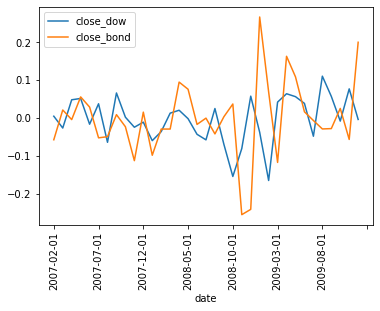

In [89]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query(" metric == 'close'")

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))


# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()